In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("bank_1.csv")
print(data)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.shape

(11162, 17)

In [7]:
data.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [8]:
data.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
#label encoding

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
selected_col=['default','housing','loan','deposit']
selected_col

['default', 'housing', 'loan', 'deposit']

In [13]:
for col in selected_col:
     data[col]=data[col].map({"yes":1,"no":0})

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [15]:
data=pd.get_dummies(data,columns=["job","marital","education","contact","month","poutcome"],drop_first=True,dtype="int64")
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [16]:
x=data.drop("deposit",axis=1)

In [17]:
x.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
y=data["deposit"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x testing {x_test.shape}")
print(f"y testing {y_test.shape}")

x training (8929, 42)
y training (8929,)
x testing (2233, 42)
y testing (2233,)


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
bank_rf=RandomForestClassifier()
bank_rf

RandomForestClassifier()

In [22]:
bank_rf.fit(x_train,y_train)
y_predict=bank_rf.predict(x_test)

In [23]:
y_predict

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1187
           1       0.82      0.88      0.85      1046

    accuracy                           0.85      2233
   macro avg       0.85      0.86      0.85      2233
weighted avg       0.86      0.85      0.85      2233



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
select_models=[LogisticRegression(),
              DecisionTreeClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5),
             RandomForestClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)] 

In [28]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
acc=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"accuracy {accuracy_score(y_pred,y_test)} of model is {model}")
    acc.append(accuracy_score(y_pred,y_test))
    print(acc)

accuracy 0.7913121361397224 of model is LogisticRegression()
[0.7913121361397224]
accuracy 0.7953425884460367 of model is DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5)
[0.7913121361397224, 0.7953425884460367]
accuracy 0.851768920734438 of model is RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)
[0.7913121361397224, 0.7953425884460367, 0.851768920734438]


In [30]:
result=[acc]
result

[[0.7913121361397224, 0.7953425884460367, 0.851768920734438]]

In [31]:
pd.DataFrame(data=result,columns=["LOGISTRICTREGRASSION","DESSISIONTREE","RANDOMFOREST"],index=["ACCURACY"])

,LOGISTRICTREGRASSION,DESSISIONTREE,RANDOMFOREST
ACCURACY,0.791312,0.795343,0.851769


In [32]:
#greed search

In [33]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [34]:
param_grid = {
    'n_estimators' : [100,200,300,350],# number of tree in the forest
    'max_depth'    : [None,10,20,30],# maximum depth of he tree
    'min_samples_split': [2,5,10],# minimum number of sample required to split an internal node
    'min_samples_leaf' : [1,2,4], # minimum number of samples reqiured to be at a leaf node
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#n_jobs = -1 for faster computation / parameters combinatitions
grid_search.fit(x_train,y_train)
#get the best hyperparameter
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

In [40]:
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

Random Hyper Parameters

1.DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3)
2.RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
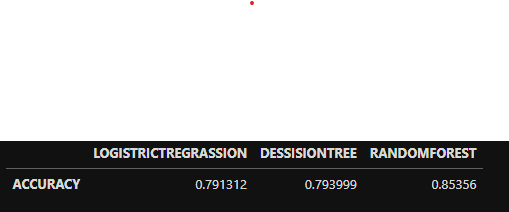
Grid Search Hyper Parameters

1. DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
2. RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)] 
n